In [2]:
import joblib
from collections import defaultdict
def default_float_dict():
    return defaultdict(float)
metrics_results = joblib.load('metrics_results.pkl')

incrx_results = metrics_results['Incx']
d_rise_results = metrics_results['D-RISE']

In [3]:
metrics = list(metrics_results['Incx']['KITTI']['RT_DETR'].keys())
metrics

['Insertion', 'Deletion', 'EPG', 'Explanation Proportion', 'Time']

In [4]:
metrics_results['Incx'].keys()

dict_keys(['BDD100K', 'KITTI', 'VIPER', 'NUSCENES'])

In [5]:
models = list(metrics_results['Incx']['KITTI'].keys())
models

['YOLO', 'RT_DETR', 'FASTER_RCNN']

In [6]:
datasets = list(metrics_results['Incx'].keys())
datasets

['BDD100K', 'KITTI', 'VIPER', 'NUSCENES']

In [7]:
import pandas as pd
import numpy as np
from incx.models.model_enum import ModelEnum
from datasets.dataset_enum import DatasetEnum
import math

results = []
for dataset in DatasetEnum:
    print(dataset.name)
    for model in ModelEnum:
        for metric in metrics:
            filtered_values_incrx = [x for val in incrx_results[dataset.name][model.name][metric].values() for x in val.values() if not (isinstance(x, float) and math.isnan(x))]
            average_value_incrx = np.mean(filtered_values_incrx)
            std_incrx = np.std(filtered_values_incrx)
            results.append({
                'Source': 'incrx_results',
                'Model': dataset.name + ' ' + model.name + ' incx',
                'Metric': metric,
                'Average': average_value_incrx,
                'STD': std_incrx
            })
            
            filtered_values_d_rise = [x for val in d_rise_results[dataset.name][model.name][metric].values() for x in val.values() if not (isinstance(x, float) and math.isnan(x))]
            average_value_d_rise = np.mean(filtered_values_d_rise)
            std_d_rise = np.std(filtered_values_d_rise)
            results.append({
                'Source': 'd_rise_results',
                'Model': dataset.name + ' ' + model.name + ' d_rise',
                'Metric': metric,
                'Average': average_value_d_rise,
                'STD': std_d_rise
            })

df = pd.DataFrame(results)

pivot_df_avg = df.pivot_table(index='Model', columns=['Metric'], values='Average')[["Insertion", "Deletion", "EPG", "Explanation Proportion", "Time"]]
pivot_df_std = df.pivot_table(index='Model', columns=['Metric'], values='STD')[["Insertion", "Deletion", "EPG", "Explanation Proportion", "Time"]]


BDD100K
KITTI
VIPER
NUSCENES


In [8]:
print("Pivot Table of Averages:")
pivot_df_avg

Pivot Table of Averages:


Metric,Insertion,Deletion,EPG,Explanation Proportion,Time
Model,,,,,
BDD100K FASTER_RCNN d_rise,0.945883,0.023349,0.197445,0.012477,170.547650
BDD100K FASTER_RCNN incx,0.944844,0.024616,0.200858,0.015069,1.057545
BDD100K RT_DETR d_rise,0.932086,0.050954,0.254216,0.038714,130.299689
BDD100K RT_DETR incx,0.931223,0.047846,0.265757,0.030365,2.543867
BDD100K YOLO d_rise,0.787872,0.032597,0.277109,0.081553,44.832143
BDD100K YOLO incx,0.810918,0.035364,0.315890,0.070011,1.221557
KITTI FASTER_RCNN d_rise,0.970524,0.021154,0.096812,0.007024,129.056464
KITTI FASTER_RCNN incx,0.964649,0.021448,0.138417,0.007366,2.148363
KITTI RT_DETR d_rise,0.974137,0.013933,0.081802,0.011356,114.092812


In [9]:
print("Pivot Table of Standard deviations:")
pivot_df_std

Pivot Table of Standard deviations:


Metric,Insertion,Deletion,EPG,Explanation Proportion,Time
Model,,,,,
BDD100K FASTER_RCNN d_rise,0.056969,0.025438,0.171684,0.011552,647.523127
BDD100K FASTER_RCNN incx,0.058090,0.026829,0.177210,0.019947,7.498977
BDD100K RT_DETR d_rise,0.046602,0.029569,0.135236,0.054643,171.098570
BDD100K RT_DETR incx,0.050237,0.026458,0.138621,0.029410,16.152302
BDD100K YOLO d_rise,0.199935,0.018416,0.097687,0.085048,22.636887
BDD100K YOLO incx,0.153561,0.027261,0.086785,0.077572,9.064384
KITTI FASTER_RCNN d_rise,0.016911,0.016769,0.082065,0.007365,422.066748
KITTI FASTER_RCNN incx,0.035296,0.016787,0.095358,0.010937,10.586391
KITTI RT_DETR d_rise,0.014839,0.016597,0.079303,0.006330,214.195045


C:\Users\lenovo\AppData\Local\Temp\ipykernel_8616\2698323920.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='category', y='value', ax=ax, palette={'YOLOv10': '#7F9AC1', 'RT-DETR': '#F4A261', 'Faster R-CNN': '#A3BFA8'}, linewidth=2,showfliers=False)


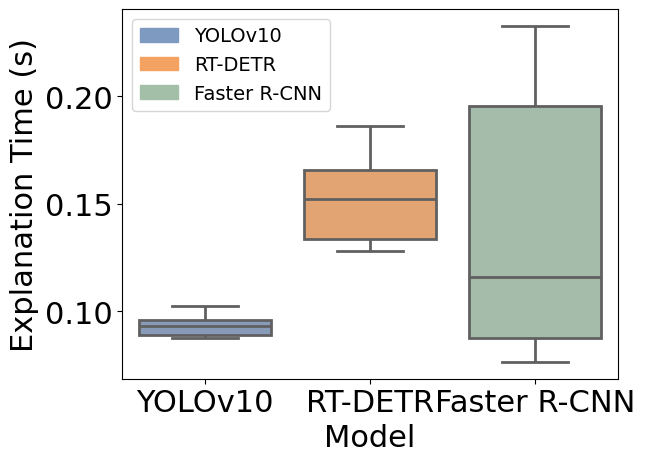

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def filter_array_2(array):
    return array

yolo = [x for val in incrx_results['KITTI']['YOLO']['Time'].values() for x in val.values() if not (isinstance(x, float) and math.isnan(x))]
rtdetr = [x for val in incrx_results['KITTI']['RT_DETR']['Time'].values() for x in val.values() if not (isinstance(x, float) and math.isnan(x))]
fasterrcnn = [x for val in incrx_results['KITTI']['FASTER_RCNN']['Time'].values() for x in val.values() if not (isinstance(x, float) and math.isnan(x))]

data_yolo = pd.DataFrame({'value': yolo, 'category': 'YOLOv10'})
data_rtdetr = pd.DataFrame({'value': rtdetr, 'category': 'RT-DETR'})
data_fasterrcnn = pd.DataFrame({'value': fasterrcnn, 'category': 'Faster R-CNN'})


data = pd.concat([data_yolo, data_rtdetr, data_fasterrcnn])

fig, ax = plt.subplots()

sns.boxplot(data=data, x='category', y='value', ax=ax, palette={'YOLOv10': '#7F9AC1', 'RT-DETR': '#F4A261', 'Faster R-CNN': '#A3BFA8'}, linewidth=2,showfliers=False)

ax.set_xlabel('Model', fontsize=22)
ax.set_ylabel('Explanation Time (s)', fontsize=22)

ax.tick_params(axis='both', which='major', labelsize=22)

handles = [
    mpatches.Patch(color='#7F9AC1', label='YOLOv10'),
    mpatches.Patch(color='#F4A261', label='RT-DETR'),
    mpatches.Patch(color='#A3BFA8', label='Faster R-CNN')
]
ax.legend(handles=handles, loc='best', fontsize=14, title_fontsize='15')

plt.savefig("blob/incrx_boxplot.pdf", format="pdf", bbox_inches="tight", pad_inches=0, dpi=300)

plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8616\1732923444.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='category', y='value', ax=ax, palette={'YOLOv10': '#7F9AC1', 'RT-DETR': '#F4A261', 'Faster R-CNN': '#A3BFA8'}, linewidth=2,showfliers=False)


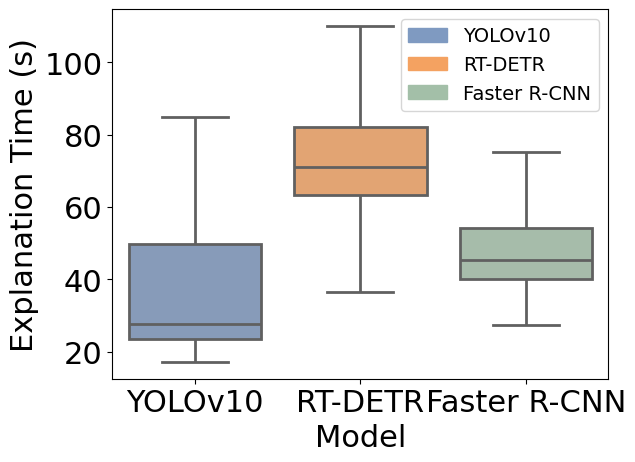

In [11]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

yolo = [x for val in d_rise_results['KITTI']['YOLO']['Time'].values() for x in val.values() if not (isinstance(x, float) and math.isnan(x))]
rtdetr = [x for val in d_rise_results['KITTI']['RT_DETR']['Time'].values() for x in val.values() if not (isinstance(x, float) and math.isnan(x))]
fasterrcnn = [x for val in d_rise_results['KITTI']['FASTER_RCNN']['Time'].values() for x in val.values() if not (isinstance(x, float) and math.isnan(x))]

data_yolo = pd.DataFrame({'value': yolo, 'category': 'YOLOv10'})
data_rtdetr = pd.DataFrame({'value': rtdetr, 'category': 'RT-DETR'})
data_fasterrcnn = pd.DataFrame({'value': fasterrcnn, 'category': 'Faster R-CNN'})

data = pd.concat([data_yolo, data_rtdetr, data_fasterrcnn])

fig, ax = plt.subplots()

sns.boxplot(data=data, x='category', y='value', ax=ax, palette={'YOLOv10': '#7F9AC1', 'RT-DETR': '#F4A261', 'Faster R-CNN': '#A3BFA8'}, linewidth=2,showfliers=False)

ax.set_xlabel('Model', fontsize=22)
ax.set_ylabel('Explanation Time (s)', fontsize=22)

ax.tick_params(axis='both', which='major', labelsize=22)

handles = [
    mpatches.Patch(color='#7F9AC1', label='YOLOv10'),
    mpatches.Patch(color='#F4A261', label='RT-DETR'),
    mpatches.Patch(color='#A3BFA8', label='Faster R-CNN')
]
ax.legend(handles=handles,  loc='best', fontsize=14, title_fontsize='15')

plt.savefig("blob/drise_boxplot.pdf", format="pdf", bbox_inches="tight", pad_inches=0, dpi=300)

plt.show()

In [12]:
import joblib
from incx.models.model_enum import ModelEnum
import numpy as np
import pandas as pd

# Load the comparison results from a pickle file
with open('comparison_results.pkl', 'rb') as f:
    comparison_results = joblib.load(f)

def filter_zeroes(array):
    return array[array != 0]

data = []
for dataset in DatasetEnum:
    for model in ModelEnum:
        pearson_filtered = [x for val in comparison_results[dataset.name][model.name]['Pearson'].values() for x in val.values() if not (isinstance(x, float) and math.isnan(x))]
        structural_filtered = [x for val in comparison_results[dataset.name][model.name]['Structural'].values() for x in val.values() if not (isinstance(x, float) and math.isnan(x))]
        dice_filtered = [x for val in comparison_results[dataset.name][model.name]['Dice'].values() for x in val.values() if not (isinstance(x, float) and math.isnan(x))]
        jaccard_filtered = [x for val in comparison_results[dataset.name][model.name]['Jaccard'].values() for x in val.values() if not (isinstance(x, float) and math.isnan(x))]
        
        pearson_mean = np.mean(pearson_filtered)
        structural_mean = np.mean(structural_filtered)
        dice_mean = np.mean(dice_filtered)
        jaccard_mean = np.mean(jaccard_filtered)
        
        pearson_std = np.std(pearson_filtered)
        structural_std = np.std(structural_filtered)
        dice_std = np.std(dice_filtered)
        jaccard_std = np.std(jaccard_filtered)
        
        data.append({
            'Model': dataset.name + ' ' + model.name,
            'Correlation Coefficient Mean': pearson_mean,
            'Correlation Coefficient Std': pearson_std,
            'Structural Mean': structural_mean,
            'Structural Std': structural_std,
            'Jaccard Mean': jaccard_mean,
            'Jaccard Std': jaccard_std,
            'Dice Mean': dice_mean,
            'Dice Std': dice_std
        })

df = pd.DataFrame(data)
df.set_index('Model', inplace=True)
df.sort_index(inplace=True)
df

,Correlation Coefficient Mean,Correlation Coefficient Std,Structural Mean,Structural Std,Jaccard Mean,Jaccard Std,Dice Mean,Dice Std
Model,,,,,,,,
BDD100K FASTER_RCNN,0.939460,0.070345,0.859866,0.121467,0.330774,0.267033,0.437110,0.305011
BDD100K RT_DETR,0.964811,0.046603,0.838288,0.160097,0.558177,0.295476,0.661116,0.295286
BDD100K YOLO,0.930671,0.087247,0.744656,0.242911,0.665974,0.167717,0.785346,0.142631
KITTI FASTER_RCNN,0.907116,0.068289,0.583244,0.313109,0.432326,0.261615,0.553490,0.280657
KITTI RT_DETR,0.911831,0.064581,0.562536,0.298144,0.565482,0.202666,0.699569,0.180213
KITTI YOLO,0.930814,0.051645,0.747051,0.204172,0.686104,0.178202,0.799264,0.139203
NUSCENES FASTER_RCNN,0.943294,0.059123,0.828418,0.188657,0.560332,0.275072,0.677366,0.235884
NUSCENES RT_DETR,0.902848,0.109192,0.802257,0.179418,0.538675,0.329276,0.632460,0.324003
NUSCENES YOLO,0.922124,0.094532,0.849437,0.152342,0.714366,0.278534,0.796708,0.228273
